<div style="background-image: url('https://teoleo.app/wp-content/uploads/2019/06/online-reviews-670x335.jpg');
background-size: 100% 100%;
font-size: 300%">

<strong><br><br><br><br><br><br><br><br><br><br><br><br>BANK  COMPLAINT ANALYSIS<br><br></strong>
</div>

# BUSINESS CONTEXT :
Central Banks collecting information about customer satisfaction with the services provided by different bank. Also collects the information about the complaints.

Bank users give ratings and write reviews about services on central bank websites. These reviews and ratings help to banks evaluate services provided and take neccesory action to improve customer services. While ratings are useful to convey the overall experience, they do not convey the context which led a reviewer to that experience.

If we look at only the rating , it is difficult to guess why the user rated the service as 4 star. However after reading the review it is not difficult to identify that the review talks about the good 'service' and 'expectations'.

BUSINESS PROBELEM :
The objective of this case study is to analyze customer reviews and predict customer satisfaction with the reviews.



<div style="background-color:#9ACD32;text-align:center;font-size: 300%"><strong><br>
PART- I:<br><br> Importing Libraries & Dataset
<br><br></strong></div>

# Importing required packages

In [3]:
#basics
import pandas as pd 
import numpy as np

#visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
%matplotlib inline
import seaborn as sns

In [4]:
#nlp
import re    #for regex
import string

import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer   # Tweet tokenizer does not split at apostophes which is what we want
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer 
from PIL import Image

#misc
import warnings
warnings.filterwarnings("ignore")
#!pip install textblob
import  textblob
from textblob import TextBlob

In [51]:
#settings
sns.set_style("whitegrid")
stop_words = set(stopwords.words("english"))
lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

In [109]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from scipy import sparse

# Importing reviews-dataset

In [7]:
import os
os.chdir("C:\\Users\\user\\Desktop\\Alab_Python\\Final Projects in Python\\5. Bank Reviews-Complaints Analysis")

bank_reviews = pd.read_excel("BankReviews.xlsx")

In [8]:
bank_reviews.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [9]:
bank_reviews.shape

(505, 4)

In [10]:
bank_reviews.columns

Index(['Date', 'Stars', 'Reviews', 'BankName'], dtype='object')

In [11]:
bank_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


## Checking missing values in the dataset

In [12]:
bank_reviews.isnull().sum()

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

There is no missing values in the dataset

<div style="background-color:#9ACD32;text-align:center;font-size: 300%"><strong><br>
PART- II:<br><br> Exploratory  Data Analysis
<br><br></strong></div> 

In [13]:
review=pd.read_excel("BankReviews.xlsx")
review.head(3)

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage


In [14]:
review.dtypes

Date        datetime64[ns]
Stars                int64
Reviews             object
BankName            object
dtype: object

## Creating different columns for analysis

In [15]:
review['Reviews'] = review['Reviews'].astype(str)
review.head(2)

,Date,Stars,Reviews,BankName,count_sent
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1


In [15]:
#sentence count 
review['count_sentence']=review['Reviews'].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
review['count_word']=review['Reviews'].apply(lambda x: len(str(x).split()))
#Unique word count
review['count_unique_word']=review['Reviews'].apply(lambda x: len(set(str(x).split())))

# Count the occurences of each words of a comment in a dictionary-format
review['wordcounts'] = review['Reviews'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

#Average length of the words
review["mean_word_len"] = review['Reviews'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#review.head(2)

In [16]:
#Letter count
review['count_letters']=review['Reviews'].apply(lambda x: len(str(x)))

#letter-density per word
review['letter_density/word'] = review['count_letters'] / (review['count_word']+1)

In [17]:
#upper case words count
review["count_words_upper"] = review['Reviews'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#lower case words count
review["count_words_lower"] = review['Reviews'].apply(lambda x: len([w for w in str(x).split() if w.islower()]))
#title case words count
review["count_words_title"] = review['Reviews'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

In [18]:
#punctuation count
review["count_punctuations"] =review['Reviews'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#Number of stopwords
review["count_stopwords"] = review['Reviews'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Number of spaces
review['Spaces'] = review['Reviews'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

In [19]:
#Number of numeric
review['numeric'] = review['Reviews'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))
#Number of alphabets
review['alphabets'] = review['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))
#Number of alphanumeric
review['alphanumeric'] = review['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

In [20]:
#Number of Words ends with 'et'
review['words_ends_with_et'] = review['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words start with 'no'
review['words_start_with_no'] = review['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

In [21]:
review.columns

Index(['Date', 'Stars', 'Reviews', 'BankName', 'count_sentence', 'count_word',
       'count_unique_word', 'wordcounts', 'mean_word_len', 'count_letters',
       'letter_density/word', 'count_words_upper', 'count_words_lower',
       'count_words_title', 'count_punctuations', 'count_stopwords', 'Spaces',
       'numeric', 'alphabets', 'alphanumeric', 'words_ends_with_et',
       'words_start_with_no'],
      dtype='object')

## Parts-Of-Speech tagging/ Pos tagging

In [22]:
mystring="Thank you very much for the excellent service, Matthew!"
blob=TextBlob(mystring).tags
print("blob:",type(blob),"\nblob-elements:",type(blob[0]))
blob

blob: <class 'list'> 
blob-elements: <class 'tuple'>


[('Thank', 'NNP'),
 ('you', 'PRP'),
 ('very', 'RB'),
 ('much', 'RB'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('excellent', 'JJ'),
 ('service', 'NN'),
 ('Matthew', 'NNP')]

##### dictionary for different parts of speechictionary for pos tags 

In [23]:
pos_dict= {'noun' : ['NN','NNS','NNP','NNPS'],
           'pronoun' : ['PRP','PRP$','WP','WP$'],
            'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
           'adj' :  ['JJ','JJR','JJS'],
           'adv' : ['RB','RBR','RBS','WRB'] 
          }

##### function to check and get the part of speech tag count of a words in a given sentence

In [24]:
def pos_count(words, pos_key):
    count = 0
    try:
        for tup in TextBlob(words).tags:
            pos_tag = tup[1]
            if pos_tag in pos_dict[pos_key]:
                count += 1
    except:
        pass
    return count

In [25]:
for key in pos_dict.keys():
    review[key+'_count']=review['Reviews'].apply(lambda x: pos_count(x,key))

In [26]:
review[['noun_count', 'pronoun_count', 'verb_count',
       'adj_count', 'adv_count']].head(3)

,noun_count,pronoun_count,verb_count,adj_count,adv_count
0,8,3,3,1,1
1,7,4,3,4,2
2,24,8,10,5,8


In [27]:
review.head().T

,0,1,2,3,4
Date,2017-04-10 00:00:00,2017-02-10 00:00:00,2017-08-21 00:00:00,2017-12-17 00:00:00,2016-05-27 00:00:00
Stars,5,5,5,5,5
Reviews,"Great job, Wyndham Capital! Each person was pr...",Matthew Richardson is professional and helpful...,We had a past experience with Wyndham Mortgage...,We have been dealing with Brad Thomka from the...,I can't express how grateful I am for the supp...
BankName,Wyndham Capital Mortgage,Wyndham Capital Mortgage,Wyndham Capital Mortgage,Wyndham Capital Mortgage,Wyndham Capital Mortgage
count_sentence,1,1,1,1,1
count_word,19,25,79,108,59
count_unique_word,19,23,64,78,47
wordcounts,"{'Great': 1, 'Wyndham': 1, 'us': 1, 'Each': 1,...","{'us': 1, 'Matthew': 1, 'much': 1, 'very': 1, ...","{'right': 1, 'they': 1, 'money.': 1, 'Wyndham'...","{'right': 1, 'out': 1, 'of': 1, 'previous': 1,...","{'how': 1, 'Wyndham': 1, 'none.': 1, 'thorough..."
mean_word_len,5.68421,5.4,4.86076,4.61111,4.79661
count_letters,126,159,462,605,341


# Classification of stars on basis of reviews

In [28]:
review.Stars.value_counts()

5    410
1     95
Name: Stars, dtype: int64

In [29]:
print("total no of reviews:",review.shape[0])
print("\nreviews with 5-star: ",review.Stars.value_counts()[5])
print("reviews with 1-star: ",review.Stars.value_counts()[1])

total no of reviews: 505

reviews with 5-star:  410
reviews with 1-star:  95


Text(0.5, 0, 'count of reviews')

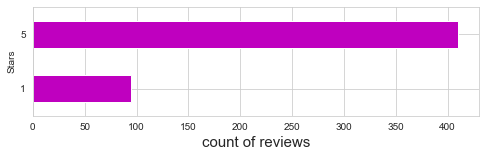

In [30]:
#Graphical Representation
plt.figure(figsize=(8,2))
review.groupby('Stars')['Reviews'].count().plot('barh',color='m')
plt.xlabel('count of reviews', fontsize=15)

<div style="background-color:#9ACD32;text-align:center;font-size: 300%"><strong><br>
PART- III:<br><br>Sentiment Analysis
<br><br></strong></div> 

# Sentiment analysis using Textblob module 

In [31]:
review['sentiment']= review["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [32]:
def senti_check(words):
    val=TextBlob(words).sentiment.polarity
    if val>0:
        return 'pos'
    elif val<0:
        return 'neg'
    else:
        return 'neutral'

review['senti_type']=review["Reviews"].apply(lambda x:senti_check(x))

In [33]:
review[["Reviews",'sentiment','senti_type']].head()

,Reviews,sentiment,senti_type
0,"Great job, Wyndham Capital! Each person was pr...",0.533333,pos
1,Matthew Richardson is professional and helpful...,0.453333,pos
2,We had a past experience with Wyndham Mortgage...,-0.033231,neg
3,We have been dealing with Brad Thomka from the...,0.093740,pos
4,I can't express how grateful I am for the supp...,0.125000,pos


In [34]:
total=review.shape[0]

# Positive Reviews Percentage
pos_reviews=(review['sentiment']>0).sum()
p1=(pos_reviews/total)*100

# Neagtive Reviews Percentage
neg_reviews=(review['sentiment']<0).sum()
p2=(neg_reviews/total)*100

# Neutral Reviews Percentage
neutral_reviews=(review['sentiment']==0).sum()
p3=(neutral_reviews/total)*100

In [35]:
rev_df=pd.DataFrame({"review_type":['positive','negative','neutral'],
                     "review_count":[pos_reviews,neg_reviews,neutral_reviews],
                     "percentage_out_of_total":[p1,p2,p3]}).set_index('review_type')
rev_df

,review_count,percentage_out_of_total
review_type,,
positive,466,92.277228
negative,35,6.930693
neutral,4,0.792079


# Classification of reviews based on Sentiment analysis

Text(0.5, 0, 'percentage of each review type out of total reviews')

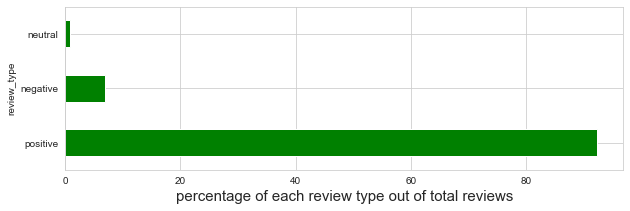

In [36]:
plt.figure(figsize=(10,3))
rev_df['percentage_out_of_total'].plot(kind='barh',color='g')
plt.xlabel("percentage of each review type out of total reviews",fontsize=15)

Text(0.5, 0, 'count of each review type out of total reviews')

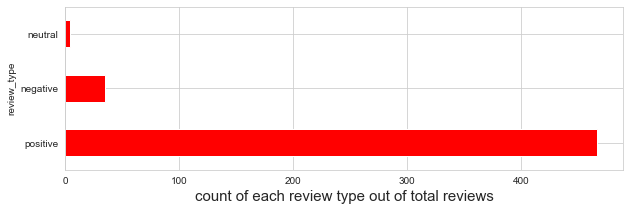

In [37]:
plt.figure(figsize=(10,3))
rev_df["review_count"].plot(kind='barh',color='r')
plt.xlabel("count of each review type out of total reviews",fontsize=15)

In [40]:
review.to_excel("bank_rev_after_EDA.xlsx")

<div style="background-color:#9ACD32;text-align:center;font-size: 300%"><strong><br>
PART- IV:<br><br>Cleaning and Pre-processing the data
<br><br></strong></div>

In [44]:
import os
os.chdir("C:\\Users\\user\\Desktop\\Alab_Python\\Final Projects in Python\\5. Bank Reviews-Complaints Analysis")

rev=pd.read_excel("bank_rev_after_EDA.xlsx")
#rev.columns

In [45]:
#rev.head()

### Udf for data preprocessing

In [56]:
#stop_words= set(nltk.corpus.stopwords.words('english'))
stop_words = set(stopwords.words("english"))
import string

def corpus_processing(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text) # removing punctuations
    text=" ".join(ele for ele in text.split() if ele not in stop_words) # removing stopwords
    return(text)

In [58]:
rev['corpus']=rev['Reviews'].apply(lambda x: corpus_processing(x))

In [59]:
rev.columns

Index(['Unnamed: 0', 'Date', 'Stars', 'Reviews', 'BankName', 'count_sentence',
       'count_word', 'count_unique_word', 'wordcounts', 'mean_word_len',
       'count_letters', 'letter_density/word', 'count_words_upper',
       'count_words_lower', 'count_words_title', 'count_punctuations',
       'count_stopwords', 'Spaces', 'numeric', 'alphabets', 'alphanumeric',
       'words_ends_with_et', 'words_start_with_no', 'noun_count',
       'pronoun_count', 'verb_count', 'adj_count', 'adv_count', 'sentiment',
       'senti_type', 'corpus'],
      dtype='object')

# Bank data - Word clouds

In [61]:
frequency_words_wo_stop= {}  

for data in rev['Reviews']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop_words:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [62]:
pd.DataFrame(frequency_words_wo_stop.items(), columns=['token', 'frequency'])\
                .sort_values(by='frequency',ascending=False).reset_index(drop=True).head()

,token,frequency
0,.,1976
1,",",1135
2,loan,313
3,',270
4,process,253


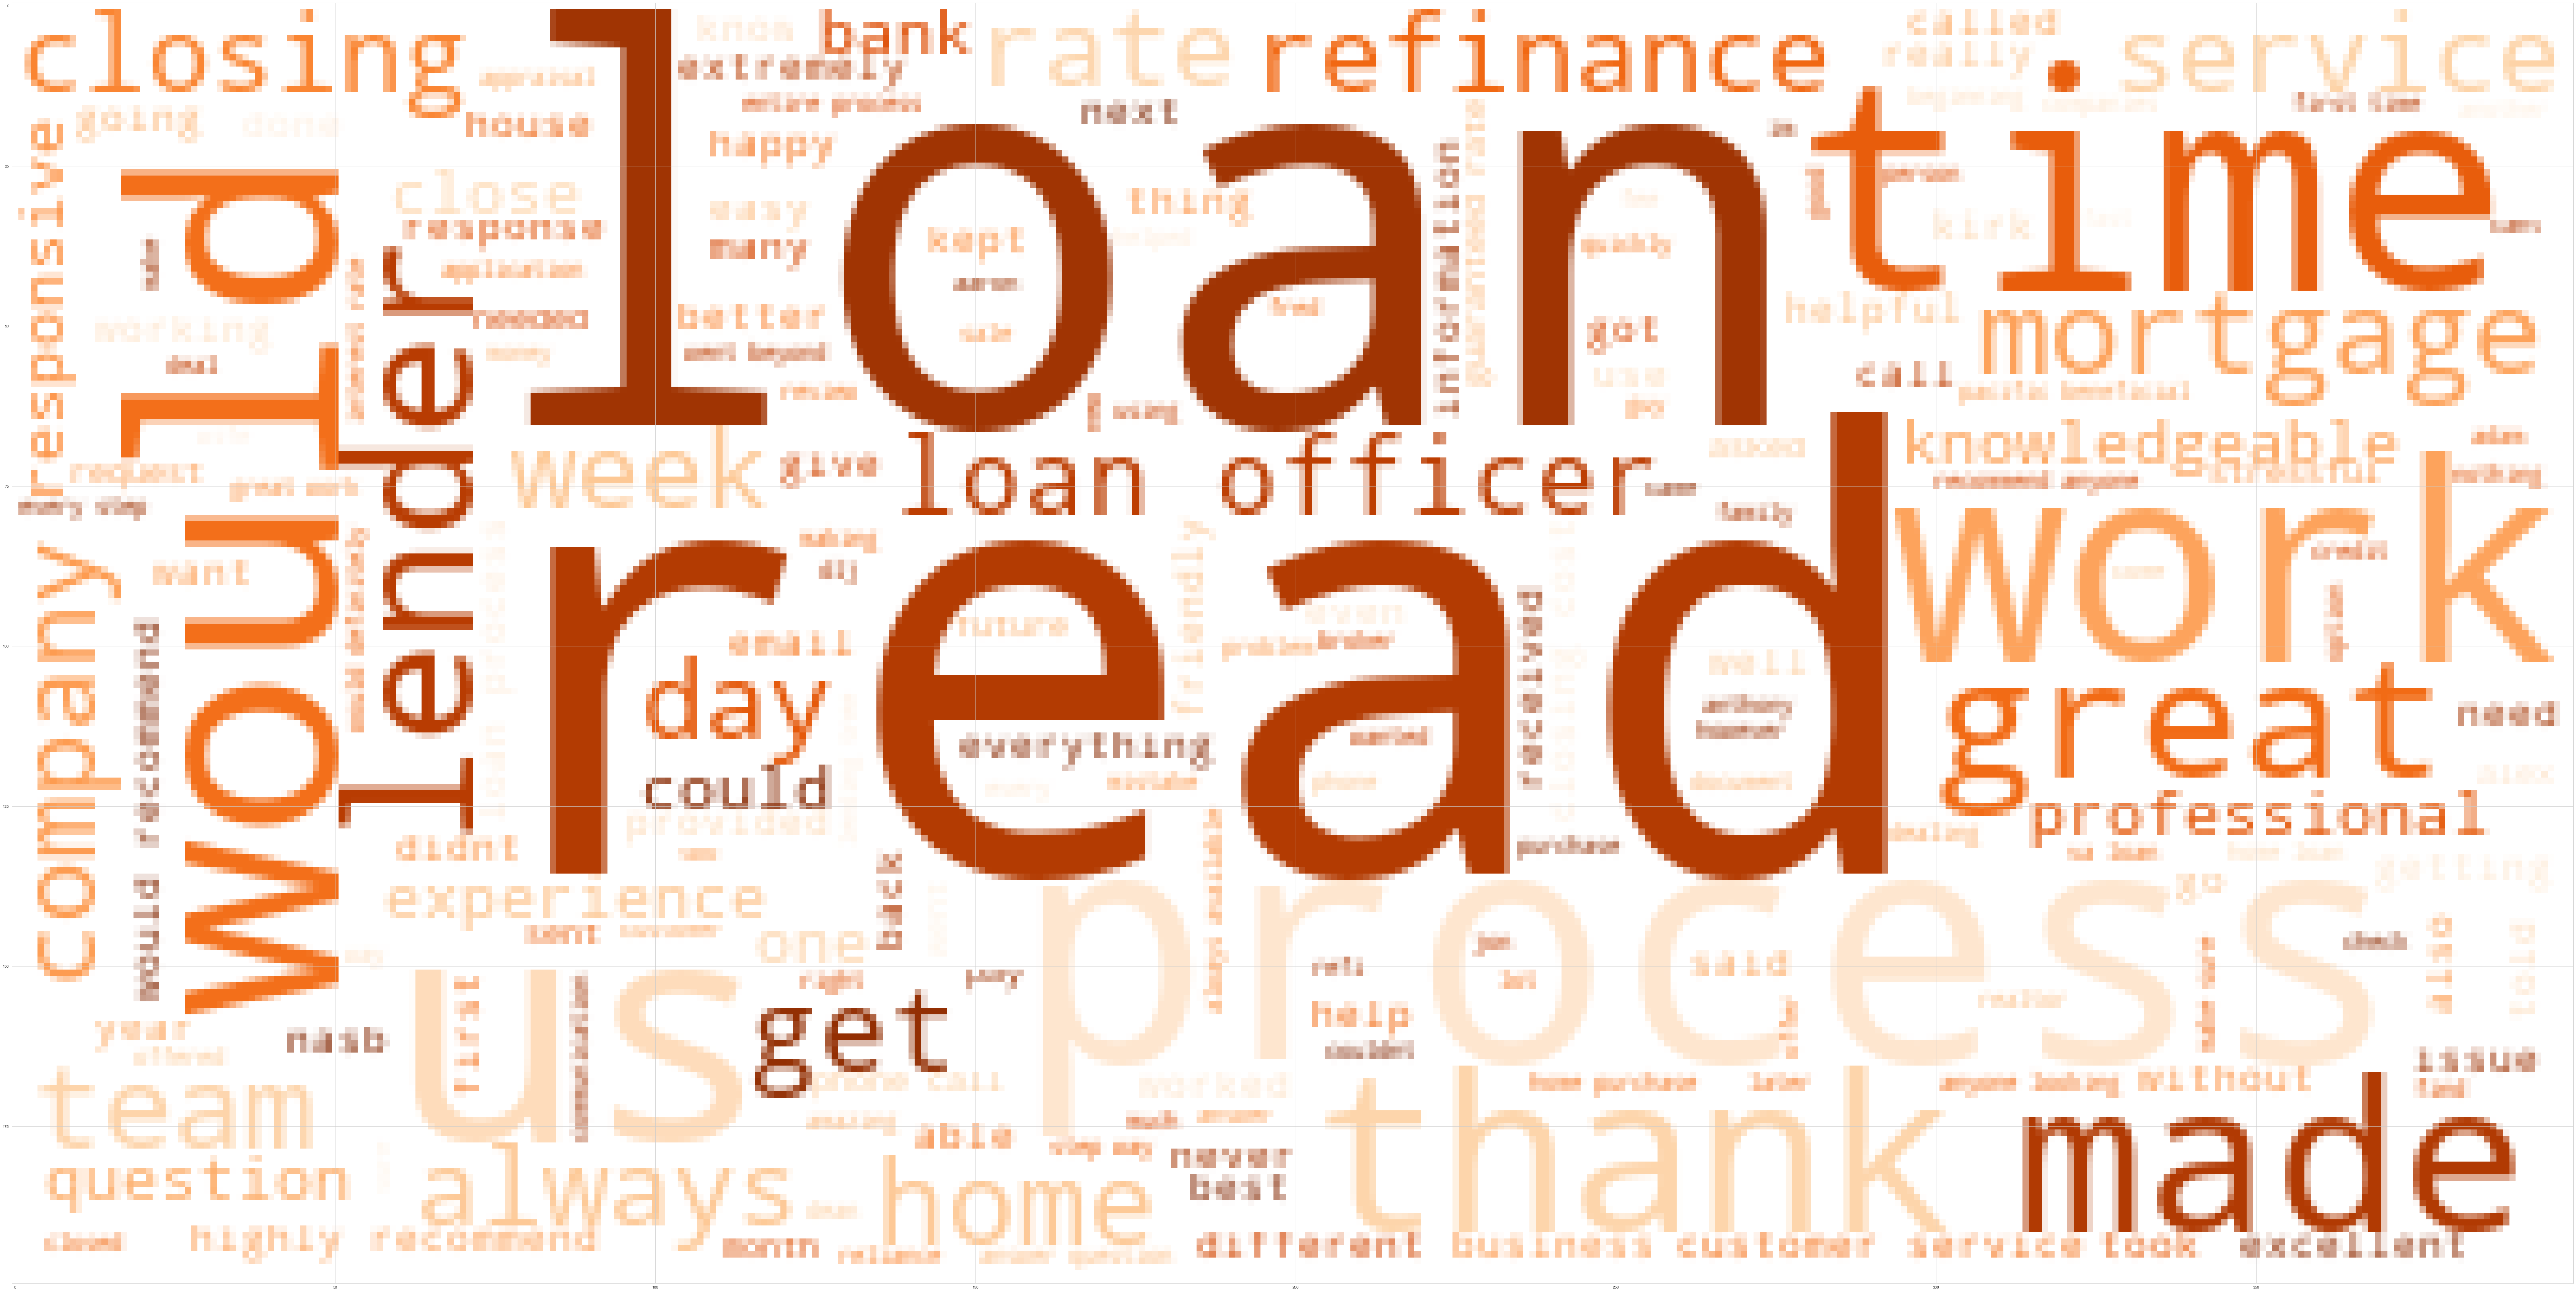

In [63]:
from wordcloud import WordCloud ,STOPWORDS

word_source=' '.join(rev['corpus'])

bankreviews_wordcloud = WordCloud(background_color='white',
                                  colormap="Oranges_r",
                                  stopwords=[]).generate(word_source)

plt.figure(figsize=(120,90))
plt.imshow(bankreviews_wordcloud)

<div style="background-color:#9ACD32;text-align:center;font-size: 300%"><strong><br>
PART- V :
<br><br>Building different models with different vectors 
<br><br></strong></div>

# Split the data into train & Test

In [64]:
# define X and y
X = rev.Reviews
y = rev.Stars
X.shape,y.shape

((505,), (505,))

In [67]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print("reviews in training dataset:",X_train.shape[0])
print("reviews in test dataset:",X_test.shape[0])

reviews in training dataset: 378
reviews in test dataset: 127


In [73]:
type(X_train)

pandas.core.series.Series

In [36]:
### data-cleaning
#X_train = X_train.apply(lambda x: corpus_processing(x))
#X_test = X_test.apply(lambda x: corpus_processing(x))

# Vectorization of train & test dataset ( count, TF-Idf) 

## Training dataset

In [78]:
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 3 ),  
                             encoding='latin-1' , 
                             max_df=0.9,min_df=0.001)
xtrain_count = count_vect.fit_transform(X_train)

In [79]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

## Test dataset

In [80]:
xtest_count = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(xtest_count)

In [81]:
print(">>count vectorization(train,test):\n",xtrain_count.shape,xtest_count.shape)
print("\n>>tf-idf(train,test):\n",X_train_tfidf.toarray().shape,X_test_tfidf.toarray().shape)

>>count vectorization(train,test):
 (378, 34247) (127, 34247)

>>tf-idf(train,test):
 (378, 34247) (127, 34247)


## Tf-Idf : word ngram 

In [82]:
tfidf_vect_ngram_words = TfidfVectorizer(analyzer='word',
                                   token_pattern='\w{1,}',
                                   ngram_range=(1,3),
                                   max_df=0.9,
                                   min_df=0.001
                                  )
tfidf_vect_ngram_words.fit(rev['Reviews'])

TfidfVectorizer(max_df=0.9, min_df=0.001, ngram_range=(1, 3),
                token_pattern='\\w{1,}')

In [83]:
xtrain_tfidf_ngram_words = tfidf_vect_ngram_words.transform(X_train)
xtest_tfidf_ngram_words = tfidf_vect_ngram_words.transform(X_test)

## Tf-Idf : characters ngram

In [84]:
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char',
                                         token_pattern='\w{1,}', 
                                         ngram_range=(1,3),
                                         max_df=0.9,
                                         min_df=0.001
                                        )
tfidf_vect_ngram_chars.fit(rev['Reviews'])

TfidfVectorizer(analyzer='char', max_df=0.9, min_df=0.001, ngram_range=(1, 3),
                token_pattern='\\w{1,}')

In [85]:
xtrain_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_train)
xtest_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_test)

### Creating UDF to train the models

In [90]:
def train_model(classifier, feature_vector_train, y_train, feature_vector_test, test_y, is_neural_net=False):
    classifier.fit(feature_vector_train,y_train) # fits the training dataset on the classifier
    predictions = classifier.predict(feature_vector_test) # predicts the labels on validation dataset
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, test_y)  #returns the accuracy of the model

### Creating a dictinary for differenr accuracy

In [91]:
accu_dict={'classifier':[],'count':[],'tf-idf':[],'ngram_words':[],'ngram_chars':[]}
#pd.DataFrame(accu_dict)

# Naive Bayes

In [92]:
print(X_train_tfidf.shape,y_train.shape)
print(X_test_tfidf.shape,y_test.shape)

(378, 34247) (378,)
(127, 34247) (127,)


In [93]:
# naive bayes on word level Count Vectors
accuracy_nb_count= train_model(naive_bayes.MultinomialNB(),
                         xtrain_count,
                         y_train,
                         xtest_count,
                         y_test)
#print("Naive Bayes for L1, Count Vectors: ", accuracy_L1)
accuracy_nb_count

0.968503937007874

In [94]:
# Naive Bayes on TF-IDF
accuracy_nb_tfidf = train_model(naive_bayes.MultinomialNB(), #classifier
                          X_train_tfidf, #feature_vector_train
                          y_train, 
                          X_test_tfidf, #feature_vector_test
                          y_test)
accuracy_nb_tfidf
#print("Naive Bayes  for L1, tf-idf Vectors: ", accuracy_nb1)

0.8188976377952756

In [95]:
# Naive Bayes on Word Level Ngram TF IDF Vectors
accuracy_nb_ngram_words = train_model(naive_bayes.MultinomialNB(), 
                          xtrain_tfidf_ngram_words, 
                          y_train, 
                          xtest_tfidf_ngram_words, 
                          y_test
                         )
#print("Naive Bayes  for L1, Word Level N-Gram Vectors: ", accuracy_L1)
accuracy_nb_ngram_words

0.8031496062992126

In [96]:
# Naive Bayes on Word Level Ngram TF IDF Vectors
accuracy_nb_ngram_chars = train_model(naive_bayes.MultinomialNB(), 
                          xtrain_tfidf_ngram_chars, 
                          y_train, 
                          xtest_tfidf_ngram_chars, 
                          y_test
                         )
#print("Naive Bayes  for L1, Word Level N-Gram Vectors: ", accuracy_L1)
accuracy_nb_ngram_chars

0.8031496062992126

In [113]:
## adding elements to accuracy dataframe for naive bayes

#accu_dict['classifier'].append('Naive Bayes')
#accu_dict['count'].append(accuracy_nb_count)
#accu_dict['tf-idf'].append(accuracy_nb_tfidf)
#accu_dict['ngram_words'].append(accuracy_nb_ngram_words)
#accu_dict['ngram_chars'].append(accuracy_nb_ngram_chars)

# Logistic Regression

In [100]:
# Logistic Regression on Count Vectors and TF-IDF
accuracy_LR_count = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("accuracy of Logistic Regression for L1, Count Vectors: ", accuracy_LR_count)

# Logistic Regression on Word Level TF IDF Vectors
accuracy_LR_tfidf = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("accuracy of Logistic Regression for L1, WordLevel TF-IDF: ",accuracy_LR_tfidf)

accuracy of Logistic Regression for L1, Count Vectors:  0.8110236220472441
accuracy of Logistic Regression for L1, WordLevel TF-IDF:  0.952755905511811


In [101]:
# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_LR_ngram_words = train_model(LogisticRegression(), xtrain_tfidf_ngram_words, y_train, xtest_tfidf_ngram_words, y_test)
print("accuracy of Logistic Regression for L1, N-Gram Vectors: ",accuracy_LR_ngram_words)

# Logistic Regression on Character Level TF IDF Vectors
accuracy_LR_ngram_chars = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("accuracy of Logistic Regression for L1, CharLevel Vectors: ",accuracy_LR_ngram_chars)

accuracy of Logistic Regression for L1, N-Gram Vectors:  0.8110236220472441
accuracy of Logistic Regression for L1, CharLevel Vectors:  0.8503937007874016


In [114]:
## adding elements to accuracy dataframe for Logistic Regression

#accu_dict['classifier'].append('Logistic Regression')
#accu_dict['count'].append(accuracy_LR_count)
#accu_dict['tf-idf'].append(accuracy_LR_tfidf)
#accu_dict['ngram_words'].append(accuracy_LR_ngram_words)
#accu_dict['ngram_chars'].append(accuracy_LR_ngram_chars)

# Linear SVC (Support Vector Classifier)

In [102]:
# Linear SVC on Count Vectors and TF-IDF
accuracy_svc_count = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_svc_count )

# Linear SVC on Word Level TF IDF Vectors
accuracy_svc_tfidf = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_svc_tfidf)

SVC  for L1, Count Vectors:  0.9606299212598425
SVC  for L1, WordLevel TF-IDF:  0.9606299212598425


In [103]:
# Linear SVC on Ngram Level TF IDF Vectors
accuracy_svc_ngram_words = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_words, y_train, xtest_tfidf_ngram_words, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_svc_ngram_words)

# Linear SVC on Character Level TF IDF Vectors
accuracy_svc_ngram_chars = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_svc_ngram_chars)

SVC  for L1, N-Gram Vectors:  0.889763779527559
SVC for L1, CharLevel Vectors:  0.937007874015748


In [115]:
## adding elements to accuracy dataframe for Support Vector Classifier

#accu_dict['classifier'].append('Support Vector Classifier')
#accu_dict['count'].append(accuracy_svc_count)
#accu_dict['tf-idf'].append(accuracy_svc_tfidf)
#accu_dict['ngram_words'].append(accuracy_svc_ngram_words)
#accu_dict['ngram_chars'].append(accuracy_svc_ngram_chars)

# Random Forest

In [107]:
# Random Forest on Count Vectors and TF-IDF
accuracy_rf_count = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_rf_count)

# Random Forest on Word Level TF IDF Vectors
accuracy_rf_tfidf = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_rf_tfidf)

LR  for L1, Count Vectors:  0.8818897637795275
LR  for L1, WordLevel TF-IDF:  0.8818897637795275


In [108]:
# Random Forest on Ngram Level TF IDF Vectors
accuracy_rf_ngram_words = train_model(RandomForestClassifier(), xtrain_tfidf_ngram_words, y_train, xtest_tfidf_ngram_words, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_rf_ngram_words)

# Random Forest on Character Level TF IDF Vectors
accuracy_rf_ngram_chars = train_model(RandomForestClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_rf_ngram_chars)

LR  for L1, N-Gram Vectors:  0.8740157480314961
LR for L1, CharLevel Vectors:  0.8818897637795275


In [116]:
## adding elements to accuracy dataframe for Random Forest

#accu_dict['classifier'].append('Random Forest')
#accu_dict['count'].append(accuracy_rf_count)
#accu_dict['tf-idf'].append(accuracy_rf_tfidf)
#accu_dict['ngram_words'].append(accuracy_rf_ngram_words)
#accu_dict['ngram_chars'].append(accuracy_rf_ngram_chars)

## ANN

In [110]:
# ANN on Count Vectors and TF-IDF
accuracy_ann1_tfidf = train_model(MLPClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("ANN for L1, Count Vectors: ", accuracy_ann1_tfidf)

# ANN on Word Level TF IDF Vectors
accuracy_ann1_count = train_model(MLPClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("ANN for L1, WordLevel TF-IDF: ", accuracy_ann1_count)

ANN for L1, Count Vectors:  0.889763779527559
ANN for L1, WordLevel TF-IDF:  0.8818897637795275


In [111]:
# ANN on Ngram Level TF IDF Vectors
accuracy_ann1_ngram_words = train_model(MLPClassifier(), xtrain_tfidf_ngram_words, y_train, xtest_tfidf_ngram_words, y_test)
print("ANN for L1, N-Gram Vectors: ", accuracy_ann1_ngram_words)
# ANN on Character Level TF IDF Vectors
accuracy_ann1_ngram_chars = train_model(MLPClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("ANN for L1, CharLevel Vectors: ", accuracy_ann1_ngram_chars)

ANN for L1, N-Gram Vectors:  0.889763779527559
ANN for L1, CharLevel Vectors:  0.968503937007874


In [117]:
## adding elements to accuracy dataframe for ANN

#accu_dict['classifier'].append('ANN')
#accu_dict['count'].append(accuracy_ann1_count)
#accu_dict['tf-idf'].append(accuracy_ann1_tfidf)
#accu_dict['ngram_words'].append(accuracy_ann1_ngram_words)
#accu_dict['ngram_chars'].append(accuracy_ann1_ngram_chars)

## ANN + logistic

In [112]:
# ANN + logistic on Count Vectors and TF-IDF
accuracy_ann2_count = train_model(MLPClassifier(activation='logistic'), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("ANN+LR  for L1, Count Vectors: ", accuracy_ann2_count)
# ANN + logistic on Word Level TF IDF Vectors
accuracy_ann2_tfidf = train_model(MLPClassifier(activation='logistic'), xtrain_count, y_train, xtest_count, y_test)
print("ANN+LR  for L1, WordLevel TF-IDF: ", accuracy_ann2_tfidf)


# ANN + logistic on Ngram Level TF IDF Vectors
accuracy_ann2_ngram_words =train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram_words, y_train, xtest_tfidf_ngram_words, y_test)
print("ANN+LR  for L1, N-Gram Vectors: ", accuracy_ann2_ngram_words)
# ANN + logistic on Character Level TF IDF Vectors
accuracy_ann2_ngram_chars = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("ANN+LR for L1, CharLevel Vectors: ", accuracy_ann2_ngram_chars)

ANN+LR  for L1, Count Vectors:  0.8976377952755905
ANN+LR  for L1, WordLevel TF-IDF:  0.8818897637795275
ANN+LR  for L1, N-Gram Vectors:  0.8740157480314961
ANN+LR for L1, CharLevel Vectors:  0.968503937007874


In [118]:
## adding elements to accuracy dataframe for ANN

#accu_dict['classifier'].append('ANN+Logistic Regression')
#accu_dict['count'].append(accuracy_ann2_count)
#accu_dict['tf-idf'].append(accuracy_ann2_tfidf)
#accu_dict['ngram_words'].append(accuracy_ann2_ngram_words)
#accu_dict['ngram_chars'].append(accuracy_ann2_ngram_chars)

In [121]:
print("--"*40)
print(">> MODEL acuracy for different Classifier-Vectorizer Combinations")
print("--"*40)
accu_df=pd.DataFrame(accu_dict).set_index('classifier')
accu_df

--------------------------------------------------------------------------------
>> MODEL acuracy for different Classifier-Vectorizer Combinations
--------------------------------------------------------------------------------


,count,tf-idf,ngram_words,ngram_chars
classifier,,,,
Naive Bayes,0.968504,0.818898,0.803150,0.803150
Logistic Regression,0.811024,0.952756,0.811024,0.850394
Support Vector Classifier,0.960630,0.960630,0.889764,0.937008
Random Forest,0.881890,0.881890,0.874016,0.881890
ANN,0.881890,0.889764,0.889764,0.968504
ANN+Logistic Regression,0.897638,0.881890,0.874016,0.968504


<div style="background-color:#9ACD32;text-align:center;font-size: 300%"><strong><br>
PART- VI
<br><br></strong></div>


# Document term metrics

In [122]:
#count_vect.get_feature_names()
print(len(count_vect.get_feature_names()))
print(count_vect.get_feature_names()[:5])
type(X_train_tfidf.toarray())  #2D numpy array


34247
['1', '1 2', '1 2 weeks', '1 8', '1 8 percent']


numpy.ndarray

In [158]:
#dtm>> document-term-metrics
dtm=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())
print(dtm.shape)
dtm.head(10).T

(378, 34247)


,0,1,2,3,4,5,6,7,8,9
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1 2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1 2 weeks,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1 8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1 8 percent,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1 month,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1 month later,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1 real,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1 real estate,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1 star,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Adding Features to a Document-Term Matrix

In [124]:
# create a DataFrame that only contains the 5-star and 1-star reviews
dfm=pd.read_excel("bank_rev_after_EDA.xlsx")
dfm = dfm.loc[(dfm.Stars==5) | (dfm.Stars==1)][['Stars','Reviews','sentiment']]

In [125]:
dfm.head()

,Stars,Reviews,sentiment
0,5,"Great job, Wyndham Capital! Each person was pr...",0.533333
1,5,Matthew Richardson is professional and helpful...,0.453333
2,5,We had a past experience with Wyndham Mortgage...,-0.033231
3,5,We have been dealing with Brad Thomka from the...,0.093740
4,5,I can't express how grateful I am for the supp...,0.125000


In [126]:
# define X and y
feature_cols = ['Reviews','sentiment']
X = dfm[feature_cols]
y = dfm.Stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=101)

In [127]:
# use CountVectorizer with text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.9,min_df=0.001, ngram_range=(2,3))
X_train_dtm = vect.fit_transform(X_train.Reviews)
X_test_dtm = vect.transform(X_test.Reviews)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Reviews', axis=1).shape

(378, 15942)
(127, 15942)


(378, 1)

In [128]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.Reviews)
X_test_dtm = vect.transform(X_test.Reviews)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Reviews', axis=1).shape

(378, 2405)
(127, 2405)


(378, 1)

In [132]:
extra = sparse.csr_matrix(X_train.drop('Reviews', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('Reviews', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(127, 2406)

In [133]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
acc_log=metrics.accuracy_score(y_test, y_pred_class)
acc_log

0.9212598425196851

In [134]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
acc_log1=metrics.accuracy_score(y_test, y_pred_class)
acc_log1

0.937007874015748

In [135]:
# use random forest with text column only
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm, y_train)
y_pred_class = rmf.predict(X_test_dtm)
acc_rmf=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf

0.8661417322834646

In [136]:
# use random forest with all features
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm_extra, y_train)
y_pred_class = rmf.predict(X_test_dtm_extra)
acc_rmf1=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf1

0.8818897637795275

In [137]:
# use ANN with text column only
mp = MLPClassifier()
mp.fit(X_train_dtm, y_train)
y_pred_class = mp.predict(X_test_dtm)
acc_mlp=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp

0.9448818897637795

In [138]:
# use ANN with all features
mp = MLPClassifier()
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp1

0.937007874015748

In [139]:
# use ANN+logistic with text column only
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm, y_train)
y_pred_class = mp.predict(X_test_dtm)
acc_mlp_ln=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln

0.952755905511811

In [140]:
# use ANN+logistic with all features
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp_ln1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln1

0.9448818897637795

In [142]:
dtm_dict={'classifier':['Logistic regression','Random Forest','ANN','ANN+Logistic'],
         'accuracy with text column only':[acc_log,acc_rmf,acc_mlp,acc_mlp_ln],
         'accuracy with all features':[acc_log1,acc_rmf1,acc_mlp1,acc_mlp_ln1]}

pd.DataFrame(dtm_dict).set_index('classifier')

,accuracy with text column only,accuracy with all features
classifier,,
Logistic regression,0.921260,0.937008
Random Forest,0.866142,0.881890
ANN,0.944882,0.937008
ANN+Logistic,0.952756,0.944882


# Topic Modelling

In [147]:
# train a LDA model(Latent Dirichlet Allocation)

from sklearn.decomposition import LatentDirichletAllocation as LDA

lda_model = LDA(n_components=20, learning_method='batch',max_iter=50)
X_topics =lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_
vocab = count_vect.get_feature_names()

print("----------\n X_topics:\n----------\n",X_topics.shape,"\n\n",X_topics)
print("-------------\n topic_word:\n-------------\n",topic_word.shape,"\n\n",topic_word)
print("--------\n vocab:\n--------\n",len(np.array(vocab)),"\n\n",np.array(vocab))

----------
 X_topics:
----------
 (378, 20) 

 [[0.00240443 0.00240443 0.00240443 ... 0.00240443 0.12163227 0.00240443]
 [0.00536528 0.00536528 0.00536528 ... 0.00536528 0.14276697 0.00536528]
 [0.00431665 0.00431665 0.00431665 ... 0.00431665 0.22015348 0.57082872]
 ...
 [0.00233609 0.00233609 0.00233609 ... 0.00233609 0.13745599 0.00233611]
 [0.00453367 0.00453367 0.00453367 ... 0.00453367 0.17645923 0.00453367]
 [0.00477241 0.00477241 0.00477241 ... 0.00477241 0.22016372 0.00477241]]
-------------
 topic_word:
-------------
 (20, 34247) 

 [[0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.05000001 0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 ...
 [0.05       0.05000026 0.05000026 ... 0.05       0.05       0.05      ]
 [0.14301491 0.05000199 0.05000199 ... 0.05000002 0.05000004 0.05000004]
 [0.05000006 0.05       0.05       ... 0.05       0.05       0.05      ]]
--------

In [148]:
print(type(list(enumerate(topic_word))[4]))
list(enumerate(topic_word))[4:8]  #'enumerate' creates list of tuples

<class 'tuple'>


[(4, array([0.05      , 0.05000026, 0.05000026, ..., 0.05      , 0.05      ,
         0.05      ])),
 (5, array([0.05000003, 0.08039901, 0.08039901, ..., 0.05      , 0.05      ,
         0.05      ])),
 (6, array([0.05000007, 0.05000027, 0.05000027, ..., 0.05      , 0.05      ,
         0.05      ])),
 (7, array([0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05]))]

In [151]:
# viewing top n=10 words from each vocab
n_top_words = 10
topic_summaries = []

#enumerate method creates a tuple like (index,element) from array
#np.argsort returns Array of indices that sort array-argument along the specified axis
#[:-(n_top_words+1):-1] indexing code extracts last n-words from the array after sorting

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    #print(">>",'|'.join(topic_words),"\n")
    topic_summaries.append(' '.join(topic_words))

In [152]:
type(topic_summaries)

list

In [155]:
#topic_summaries

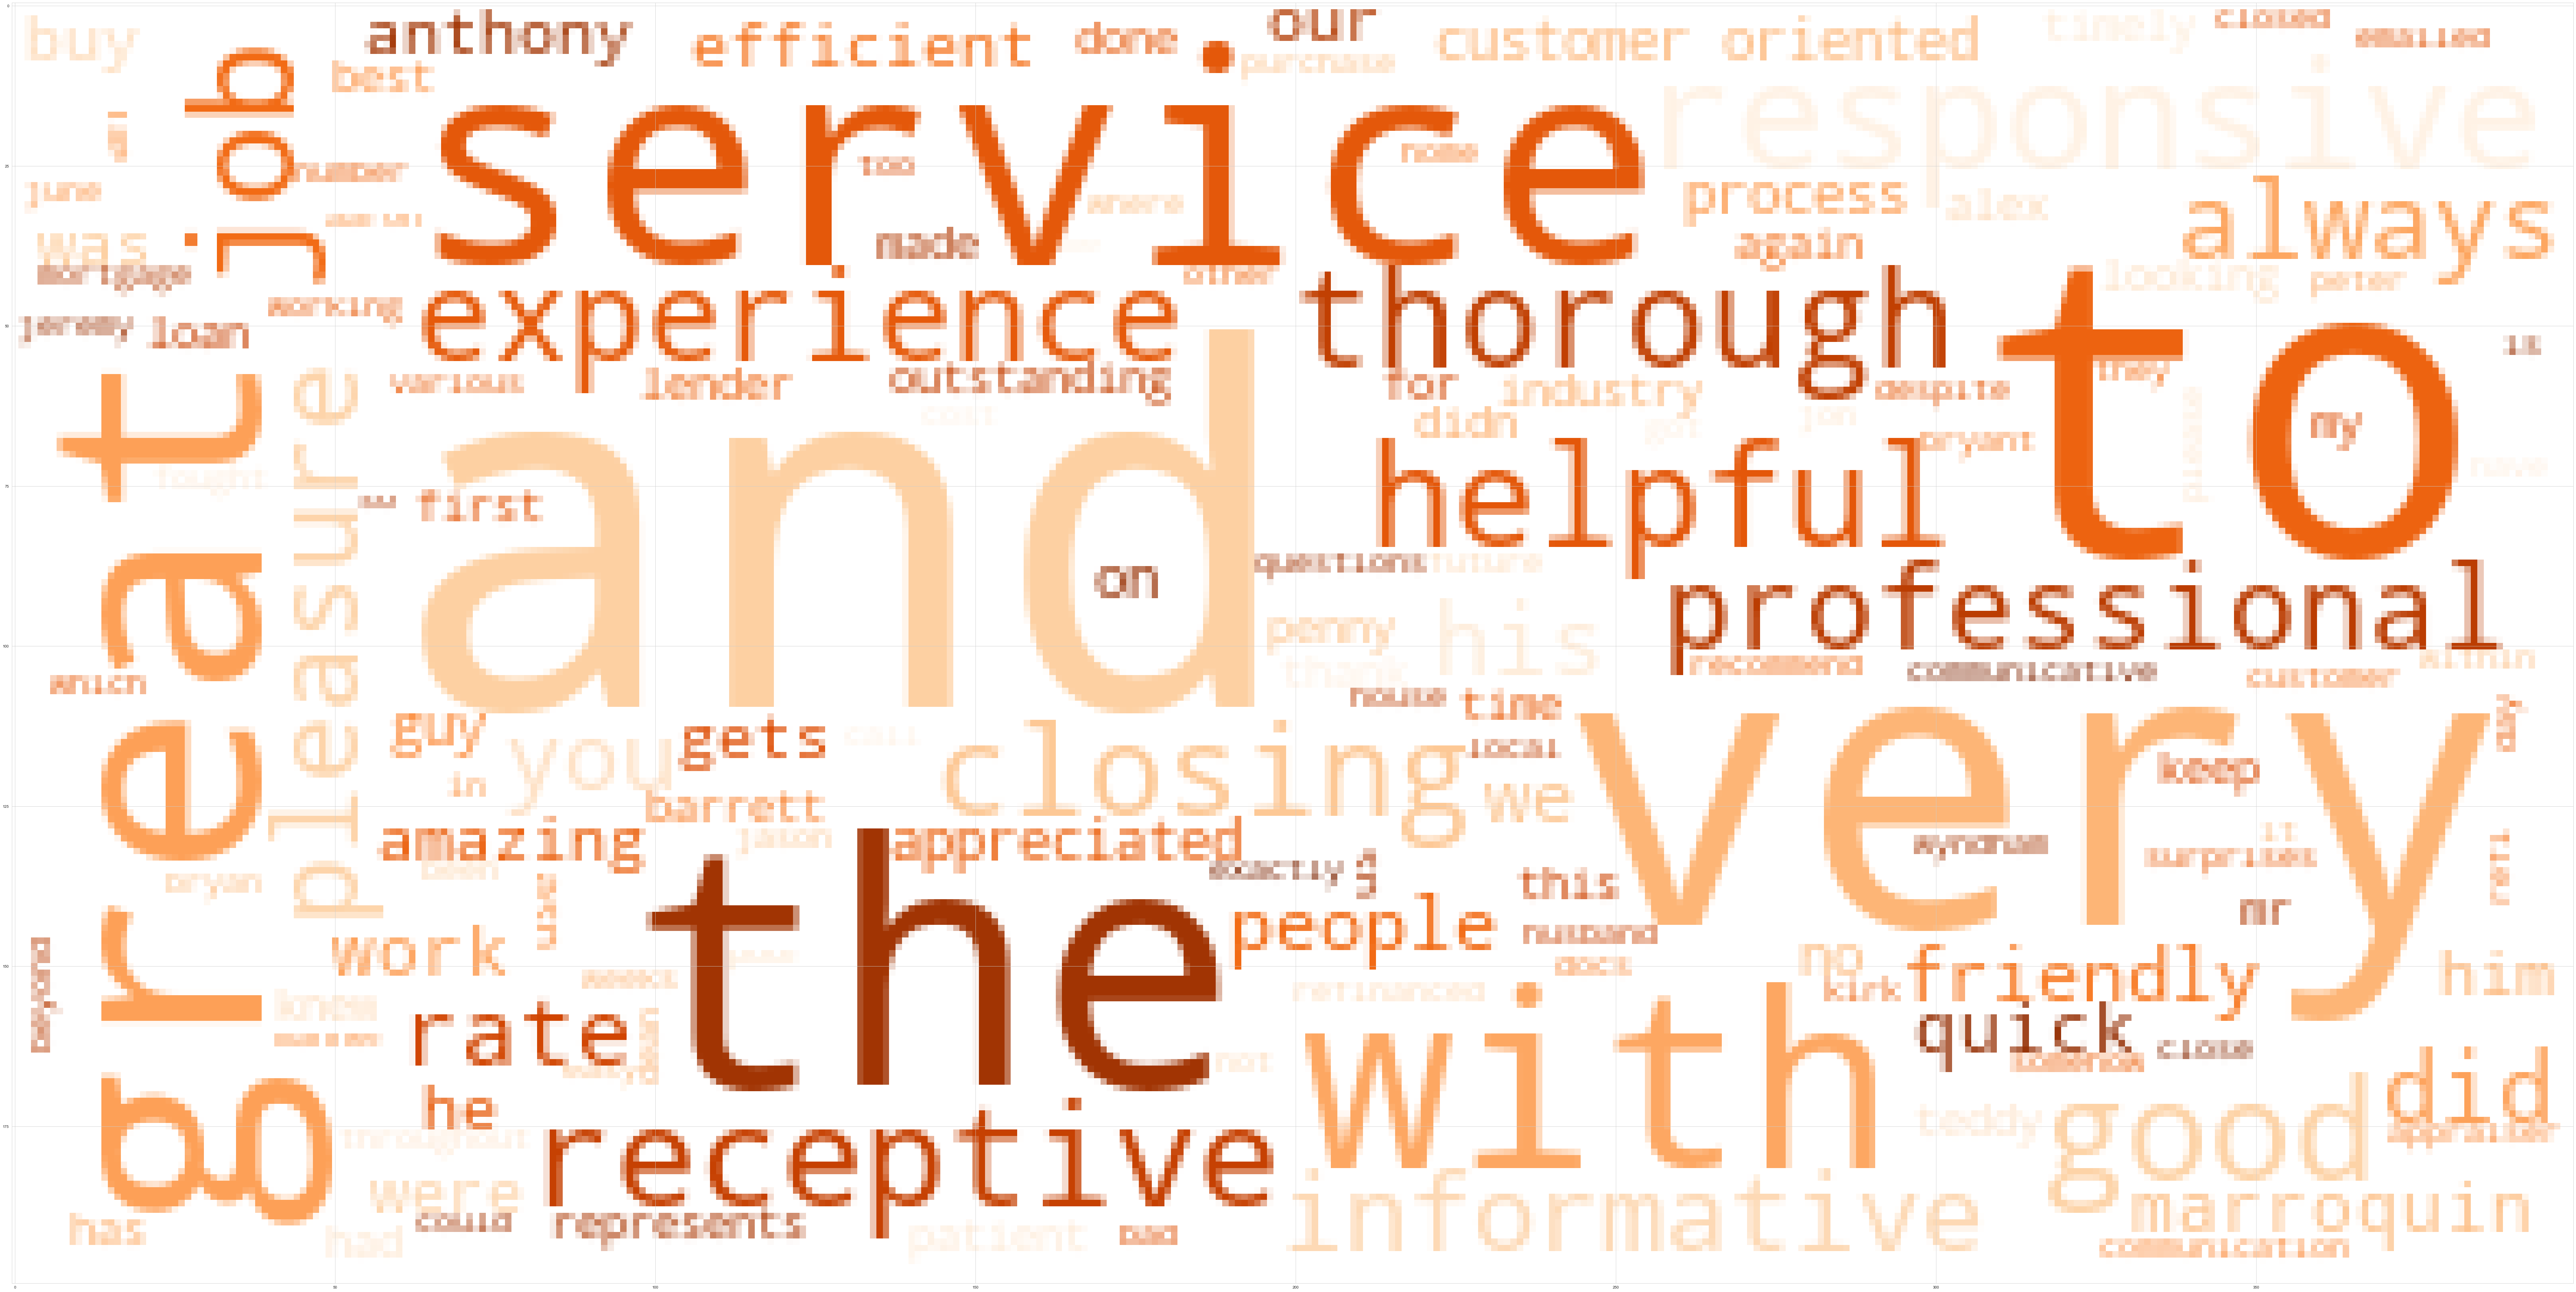

In [156]:
#from wordcloud import WordCloud ,STOPWORDS
long_string=' '.join(topic_summaries)

bankreviews_wordcloud = WordCloud(background_color='white',
                                  colormap="Oranges_r",
                                  stopwords=[]).generate(long_string)

plt.figure(figsize=(120,90))
plt.imshow(bankreviews_wordcloud)